<a href="https://colab.research.google.com/github/ndb796/Deep-Learning-Basic-for-KISA/blob/master/Image_Crawling_%2B_Transfer_Learning_%2B_Web_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 세 가지 기능을 합쳐서 순식간에 <b>상용 인공지능 서비스</b> 만들기
  1. 이미지 크롤링(Image Crawling)
  2. 전이 학습(Transfer Learning)
  3. 웹 API
* 무엇을 만들어 볼까요? 마동석/김종국 분류기

* 수집한 이미지를 저장하기 위한 폴더 생성

In [ ]:
import os

dataset_root = "./custom_dataset/"
dirs = ["train/dongseok", "val/dongseok", "train/jongkook", "val/jongkook"]

for dir in dirs:
    if not(os.path.isdir(dataset_root + dir)):
        os.makedirs(os.path.join(dataset_root + dir))

* 마동석 이미지 수집 (Train: 20개, Test: 10개)

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus

baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
query = "마동석"
url = baseUrl + quote_plus(query)
html = urlopen(url)
soup = bs(html, "html.parser")
img = soup.find_all(class_='_img')

cnt = 1
for i in img:
  imgUrl = i['data-source']
  print(imgUrl)
  if cnt <= 20:
    with urlopen(imgUrl) as f:
      with open('./custom_dataset/train/dongseok/' + query + str(cnt) + '.jpg','wb') as h:
        img = f.read()
        h.write(img)
  else:
    with urlopen(imgUrl) as f:
      with open('./custom_dataset/val/dongseok/' + query + str(cnt) + '.jpg','wb') as h:
        img = f.read()
        h.write(img)
  if cnt == 30:
      break
  cnt += 1

https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDA3MjlfMTM2%2FMDAxNTk1OTY2NTE1MjA3.izg_90HB_Rh3nLhninO_WLM-j02sG5fF6y1Hn68MIHUg.fDSHPgP97Am7mITIe03o12yCtm5EEN4hZMukNzVz_iYg.PNG.yunyeaji4686%2FCA145DC0-C615-46FC-BBA2-C100914A47F7.png&type=b400
https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F421%2F2018%2F03%2F06%2F0003241316_001_20180306100842921.jpg&type=b400
https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxNzExMjhfMjM2%2FMDAxNTExODM3NDk3ODg1.Xsi155t6H25Phy8Wtg6zhvohUliAqToLoAlJEsuoEL8g.paRgSNIDEWRbhB9l55WvNo2rt3KBh7oWkqxTssnx1t8g.JPEG.critical_red%2F%25B8%25B6%25B5%25BF%25BC%25AE%25B7%25CE%25B0%25ED.jpg&type=b400
https://search.pstatic.net/common/?src=http%3A%2F%2Fpost.phinf.naver.net%2FMjAxODAyMDJfMTI1%2FMDAxNTE3NTQ2NDQ2MDg0.DBHyp6Mams_nSg53qhvsd5GvdKODN0Qad6YenWH9OmMg.7HPzDReH0dQQRcwAXIkiJqsGGp7Lf2KRagi1zVh6mQQg.JPEG%2FIcxBF7Yh6PR_zIENLytm2EDPHQd0.jpg&type=b400
https://search.pstatic.net/commo

* 김종국 이미지 수집 (Train: 20개, Test: 10개)

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus

baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
query = "김종국"
url = baseUrl + quote_plus(query)
html = urlopen(url)
soup = bs(html, "html.parser")
img = soup.find_all(class_='_img')

cnt = 1
for i in img:
  imgUrl = i['data-source']
  print(imgUrl)
  if cnt <= 20:
    with urlopen(imgUrl) as f:
      with open('./custom_dataset/train/jongkook/' + query + str(cnt) + '.jpg','wb') as h:
        img = f.read()
        h.write(img)
  else:
    with urlopen(imgUrl) as f:
      with open('./custom_dataset/val/jongkook/' + query + str(cnt) + '.jpg','wb') as h:
        img = f.read()
        h.write(img)
  if cnt == 30:
      break
  cnt += 1

https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxOTAzMDdfMTY5%2FMDAxNTUxOTMxODgyMDQ1.xsZbz32ZEnFctRfvshP6d8z4Ea2abD2mNBbONPisxWEg.4x1rzUpWdPBxPs6-OeyouX3v-BJoe8zflbUO2SZkYuYg.JPEG.k0510k12%2FDFD5D7jhk.jpg&type=b400
https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F311%2F2020%2F08%2F19%2F0001190102_001_20200819110619975.jpg&type=b400
https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDA5MTVfMjk2%2FMDAxNjAwMTQ1MDI5NDk3.G9aLppS0lIwgC78jQLvgDi0AxabHLoKWVaBOUUgfh4Ag.scHg9cE5PV3KaRrX1Gq3MTE48OnrkdxhQYirw3mk30gg.JPEG.online4%2F1101.jpg&type=b400
https://search.pstatic.net/common/?src=http%3A%2F%2Fcafefiles.naver.net%2FMjAyMDA3MjFfODYg%2FMDAxNTk1MzM2NTUyMjYz.k0xpL1aKG1xXPeXUmLP1Uw1QGc-fx8rqQ3zlCJCR_PQg.adrsDN2Odu9V-l0UIdA-mcgiYIaLe0dNGHcWV6gmYZAg.JPEG%2F%25B1%25E8%25C1%25BE%25B1%25B9.jpg&type=b400
https://search.pstatic.net/common/?src=http%3A%2F%2Fmusicmeta.phinf.naver.net%2Fphoto%2F000%2F022%2F22570.jpg&ty

* PyTorch를 이용한 전이 학습(Transfer Learning) 예제

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms

In [ ]:
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()

In [ ]:
# 학습을 위해 데이터 증가(augmentation) 및 일반화(normalization)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './custom_dataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)
class_names = image_datasets['train'].classes
print(class_names)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

{'train': 40, 'val': 20}
['dongseok', 'jongkook']


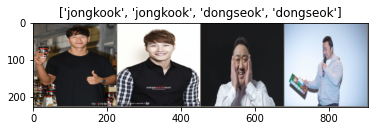

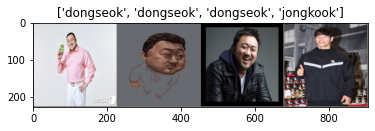

In [ ]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하여 출력
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 이미지가 갱신될 때까지 기다리기

# 학습 데이터의 배치를 얻기
iterator = iter(dataloaders['train'])

# 배치로부터 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

# 배치로부터 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))

        # 각 에폭(epoch)은 학습 단계와 검증 단계를 가지도록 하나의 함수에 넣기
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # 학습을 할 때만 연산 기록 추적하기
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # 학습 단계인 경우 역전파 이후에 파라미터 학습하기
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # 모델을 깊은 복사(deep copy)함
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # 가장 정확도가 높은 모델을 이용
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2) # 모델의 출력 뉴런 수를 2개로 교체
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Epoch 7마다 0.1씩 학습률에 곱해주기
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
train Loss: 0.8463 Acc: 0.5000
val Loss: 0.6358 Acc: 0.7000

Epoch 1/24
train Loss: 0.4275 Acc: 0.7750
val Loss: 0.3858 Acc: 0.8500

Epoch 2/24
train Loss: 0.5009 Acc: 0.7500
val Loss: 0.3051 Acc: 0.9000

Epoch 3/24
train Loss: 0.0993 Acc: 0.9750
val Loss: 0.3186 Acc: 0.8000

Epoch 4/24
train Loss: 0.4247 Acc: 0.7750
val Loss: 0.1888 Acc: 0.9000

Epoch 5/24
train Loss: 0.5052 Acc: 0.7750
val Loss: 0.1216 Acc: 1.0000

Epoch 6/24
train Loss: 0.1702 Acc: 0.9250
val Loss: 0.0737 Acc: 1.0000

Epoch 7/24
train Loss: 0.3565 Acc: 0.8000
val Loss: 0.0808 Acc: 1.0000

Epoch 8/24
train Loss: 0.1836 Acc: 0.9000
val Loss: 0.0695 Acc: 1.0000

Epoch 9/24
train Loss: 0.1966 Acc: 0.9250
val Loss: 0.0672 Acc: 1.0000

Epoch 10/24
train Loss: 0.0384 Acc: 1.0000
val Loss: 0.0683 Acc: 1.0000

Epoch 11/24
train Loss: 0.1301 Acc: 0.9500
val Loss: 0.0652 Acc: 1.0000

Epoch 12/24
train Loss: 0.1087 Acc: 0.9500
val Loss: 0.0683 Acc: 1.0000

Epoch 13/24
train Loss: 0.2949 Acc: 0.8000
val Loss: 0.0710 A

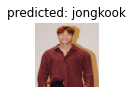

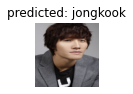

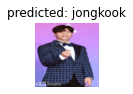

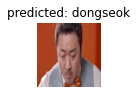

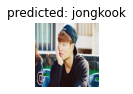

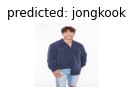

In [ ]:
visualize_model(model_ft)

tensor([[[[-1.6042, -1.6042, -1.6042,  ..., -1.6042, -1.6042, -1.6042],
          [-1.6042, -1.6042, -1.6042,  ..., -1.6042, -1.6042, -1.6042],
          [-1.6042, -1.6042, -1.6042,  ..., -1.6042, -1.6042, -1.6042],
          ...,
          [-1.6042, -1.6042, -1.6042,  ..., -1.6042, -1.6042, -1.6042],
          [-1.6042, -1.6042, -1.6042,  ..., -1.6042, -1.6042, -1.6042],
          [-1.6042, -1.6042, -1.6042,  ..., -1.6042, -1.6042, -1.6042]],

         [[-0.7402, -0.7402, -0.7402,  ..., -0.7402, -0.7402, -0.7402],
          [-0.7402, -0.7402, -0.7402,  ..., -0.7402, -0.7402, -0.7402],
          [-0.7402, -0.7402, -0.7402,  ..., -0.7402, -0.7402, -0.7402],
          ...,
          [-0.7402, -0.7402, -0.7402,  ..., -0.7402, -0.7402, -0.7402],
          [-0.7402, -0.7402, -0.7402,  ..., -0.7402, -0.7402, -0.7402],
          [-0.7402, -0.7402, -0.7402,  ..., -0.7402, -0.7402, -0.7402]],

         [[-0.9156, -0.9156, -0.9156,  ..., -0.9156, -0.9156, -0.9156],
          [-0.9156, -0.9156, -

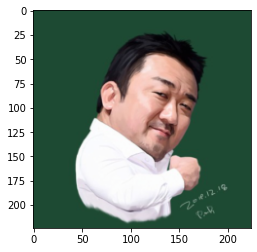

tensor([[ 1.5444, -2.2982]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([0], device='cuda:0')
dongseok


In [ ]:
# 테스트용 코드
print(image_datasets['val'][0][0].unsqueeze(0))
imshow(image_datasets['val'][0][0].cpu())

model_ft.eval()
images_so_far = 0

outputs = model_ft(image_datasets['val'][0][0].unsqueeze(0).to(device))
_, preds = torch.max(outputs, 1)

print(outputs)
print(preds)
print(class_names[preds[0]])

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok

In [ ]:
def transform_image(image_bytes):
    my_transforms = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(
                                            [0.485, 0.456, 0.406],
                                            [0.229, 0.224, 0.225])])
    image = Image.open(io.BytesIO(image_bytes))
    return my_transforms(image).unsqueeze(0)

def get_prediction(image_bytes):
    tensor = transform_image(image_bytes=image_bytes)
    outputs = model_ft(tensor.to(device))
    print("Model output:", outputs)
    _, preds = torch.max(outputs, 1)
    predicted_idx = str(preds.item())
    return predicted_idx, class_names[preds[0]]

import io
from PIL import Image
from flask import Flask, jsonify, request
app = Flask(__name__)

count = 0

@app.route('/predict', methods=['POST'])
def predict():
    global count
    if request.method == 'POST':
        file = request.files['file']
        img_bytes = file.read()
        class_id, class_name = get_prediction(image_bytes=img_bytes)
        print("클라이언트로부터 받은 이미지를 저장:" + str(count) + ".png")
        fig = plt.figure()
        current_image = Image.open(io.BytesIO(img_bytes))
        current_image.save(str(count) + ".png")
        print("결과:", {'class_id': class_id, 'class_name': class_name})
        count += 1
        return jsonify({'class_id': class_id, 'class_name': class_name})

In [ ]:
run_with_ngrok(app)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://90e117f42d27.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
Model output: tensor([[-0.3004, -0.8222]], device='cuda:0', grad_fn=<AddmmBackward>)
클라이언트로부터 받은 이미지를 저장:0.png


127.0.0.1 - - [23/Sep/2020 06:24:08] "POST /predict HTTP/1.1" 200 -


결과: {'class_id': '0', 'class_name': 'dongseok'}


127.0.0.1 - - [23/Sep/2020 06:24:38] "POST /predict HTTP/1.1" 200 -


Model output: tensor([[-1.7460,  1.0271]], device='cuda:0', grad_fn=<AddmmBackward>)
클라이언트로부터 받은 이미지를 저장:1.png
결과: {'class_id': '1', 'class_name': 'jongkook'}


127.0.0.1 - - [23/Sep/2020 06:24:47] "POST /predict HTTP/1.1" 200 -


Model output: tensor([[-2.0222,  1.2993]], device='cuda:0', grad_fn=<AddmmBackward>)
클라이언트로부터 받은 이미지를 저장:2.png
결과: {'class_id': '1', 'class_name': 'jongkook'}


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

* 클라이언트 테스트

> curl -X POST -F file=@jongkook2.jp.jpg http://26ce5a616f92.ngrok.io/predict

* 실제 클라이언트로부터 입력 받은 이미지 출력해보기

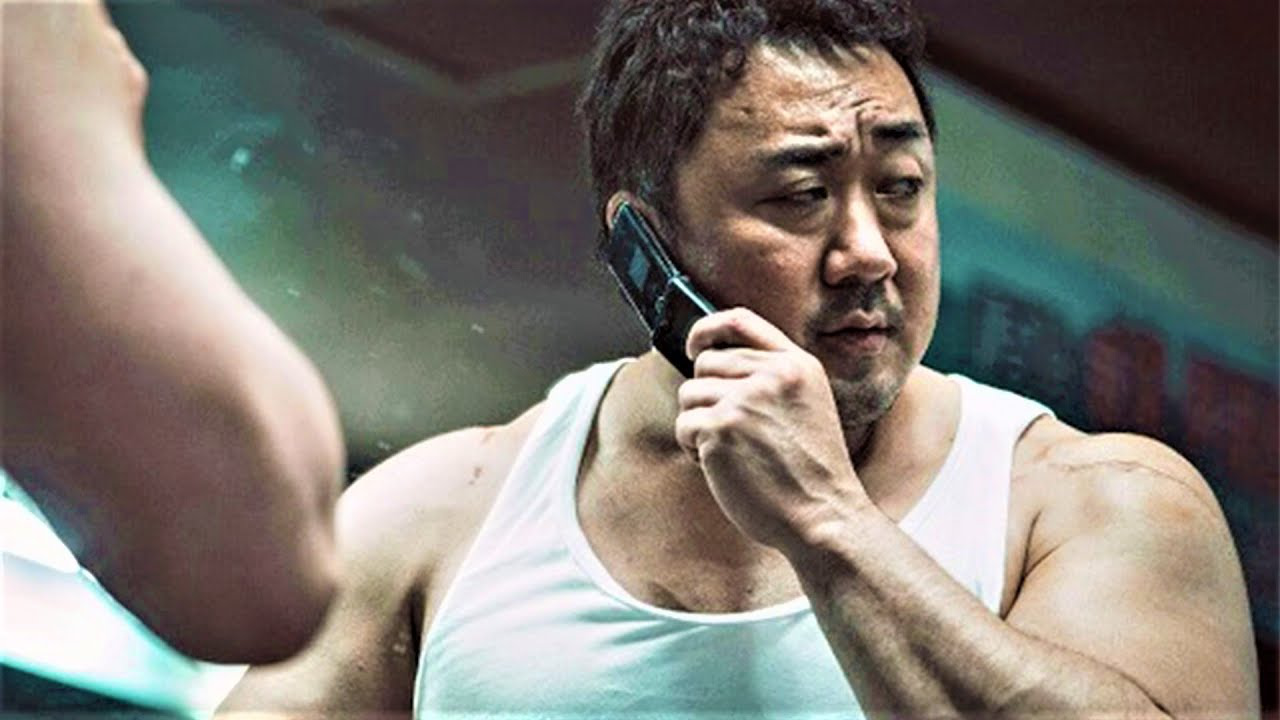

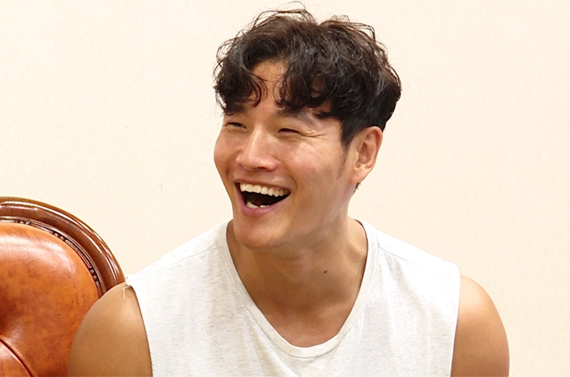

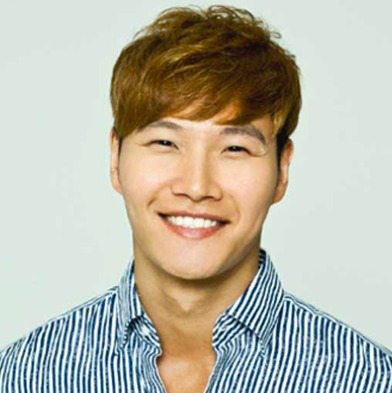

In [ ]:
from IPython.display import Image, display

display(Image('0.png', width=240))
display(Image('1.png', width=240))
display(Image('2.png', width=240))